In [17]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [18]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('D:/python/rdkit/new222new.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                                  SMILES  \
0               OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O   
1     O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...   
2     OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...   
3                CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2   
4                          CN1CC2CC(C1)C1=CC=CC(=O)N1C2   
...                                                 ...   
8433                                      O=[N+]([O-])C   
8434                                                 OC   
8435                                            S=C(N)N   
8436                                           O=C(NO)N   
8437                                            O=C(N)N   

      measured log(solubility:mol/L)  
0                               0.79  
1                               0.79  
2                               0.79  
3                               0.65  
4                               0.65  
...                        

In [41]:
y = sol.iloc[:,1]
y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

In [40]:

X = []

for smile, Hlist in XY.items():
    try:
        X.append(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), radius=2,nBits = 2048))

    except:
        pass
X = [list(a) for a in X]
print(len(X))


8438


In [5]:
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression



In [57]:


nonzero_indices = [i for i, coef in enumerate(reg.coef_) if coef != 0]
nonzero_coefs = [reg.coef_[i] for i in nonzero_indices]

# Create a dataframe with the nonzero coefficients
coefs_df = pd.DataFrame({'Bit': nonzero_indices, 'Coefficient': nonzero_coefs})

# Save the dataframe to a csv file
coefs_df.to_csv('lasso_coefs.csv', index=False)


In [56]:
x = X



# Fit a LASSO regression model on the fingerprints and target variable
reg = Lasso(alpha=0.01)
reg.fit(x, y)

nonzero_indices = [i for i, coef in enumerate(reg.coef_) if coef != 0]
for i in nonzero_indices:
    print("Bit", i, ":", reg.coef_[i])

# Select the columns with nonzero coefficients from the x array
x_nonzero = [[row[i] for i in nonzero_indices] for row in x]

Bit 1 : -0.05526644542757353
Bit 2 : -0.021229676961658308
Bit 97 : -0.5406050713781421
Bit 113 : -0.7635518194526666
Bit 114 : -0.7005024875195844
Bit 116 : -0.41389811077449085
Bit 147 : -0.11905674916033511
Bit 222 : 0.47899798494229784
Bit 227 : 0.49874120718089365
Bit 283 : -0.26655672737965386
Bit 294 : -0.2953202317993458
Bit 314 : 0.18495526645986587
Bit 322 : -0.19824676470337801
Bit 352 : -0.8035414465680405
Bit 366 : -0.2095677934835081
Bit 378 : 0.18408203322990838
Bit 389 : 0.0919792557493425
Bit 401 : -0.28712580948756244
Bit 486 : 0.1900365265562244
Bit 561 : -0.698314468816143
Bit 591 : -0.2587329539781839
Bit 650 : 0.2660247736981636
Bit 661 : -0.08839269253266398
Bit 675 : -0.09390879968318701
Bit 694 : -0.12088934521351938
Bit 715 : -0.14413861311662995
Bit 725 : -0.3299758070083639
Bit 728 : -0.2913248582449641
Bit 739 : -0.39426995325638436
Bit 794 : -0.2688962570191682
Bit 807 : 0.7868294704755936
Bit 808 : -0.3032855999905743
Bit 816 : -0.07033199272411447
Bit 87

In [92]:
len(x_nonzero)

8438

In [93]:
X=x_nonzero
len(X)

8438

In [80]:
len(y)

8438

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=991)
#test size is 20% and traing size is 80%
#linear regression
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
from sklearn.metrics import mean_absolute_error

In [82]:
linearmodel=linear_model.LinearRegression()
linearmodel.fit(X_train, Y_train)

LinearRegression()

In [83]:
#predicts the X_train
Y_pred_train = linearmodel.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 1.17
Coefficient of determination (R^2): 0.60


In [238]:
mae = mean_absolute_error(Y_train, Y_pred_train)
mae

0.8847040526880584

In [84]:
#predicts the X_test
Y_pred_test = linearmodel.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 1.14
Coefficient of determination (R^2): 0.63


In [239]:
mae = mean_absolute_error(Y_test, Y_pred_test)
mae

0.8703598886091288

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [22]:
Y_pred_train = model.predict(X_train)
#predicts the X_train
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 0.35
Coefficient of determination (R^2): 0.96


In [244]:
mae = mean_absolute_error(Y_train, Y_pred_train)
mae

0.3400665477837547

In [243]:
Y_pred_test = model.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.93
Coefficient of determination (R^2): 0.76


In [245]:
mae = mean_absolute_error(Y_test, Y_pred_test)
mae

0.6490958075801325

In [120]:
from sklearn.linear_model import LinearRegression

In [43]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [ ]:
#traind with 204

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=991)
#test size is 20% and traing size is 80%
#linear regression
#from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
#predicts the X_train
Y_pred_train = reg.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 0.77
Coefficient of determination (R^2): 0.83


In [45]:
#predicts the X_test
Y_pred_test = reg.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.78
Coefficient of determination (R^2): 0.83


In [102]:
from sklearn.metrics import mean_absolute_error

In [103]:
mae = mean_absolute_error(Y_test, Y_pred_test)
mae

0.5873795292940945

In [104]:
mae = mean_absolute_error(Y_train, Y_pred_train)
mae

0.5764090723814467

In [53]:

reg = LinearRegression()
reg.fit(X, y)

# Print out the coefficients for each fingerprint
for i in range(len(X[0])):
    print("Bit", i, ":", reg.coef_[i])


Bit 0 : 0.2952108664151758
Bit 1 : -0.2606446956212174
Bit 2 : -0.7105799186736518
Bit 3 : 0.2633350002677787
Bit 4 : -0.30296852260657836
Bit 5 : -0.7505045664056917
Bit 6 : -0.5379681833761913
Bit 7 : 0.18088937343219513
Bit 8 : -0.5112456105356991
Bit 9 : -0.5522660871281257
Bit 10 : 0.041047293916116556
Bit 11 : -0.0353655980009524
Bit 12 : -0.06945827762112933
Bit 13 : 0.09516261810080182
Bit 14 : 0.07261446595430343
Bit 15 : 0.9725416659886452
Bit 16 : -0.7848549630840087
Bit 17 : 0.10698538565202687
Bit 18 : -0.24146042610211235
Bit 19 : -0.42980990853150675
Bit 20 : -0.09764111736397996
Bit 21 : -0.2574211025510868
Bit 22 : -0.8131138862490818
Bit 23 : 0.048811160678256416
Bit 24 : -0.17532242501624112
Bit 25 : -0.2816914417036024
Bit 26 : 0.28116716428137933
Bit 27 : -0.0430352922734627
Bit 28 : -0.13597718669007186
Bit 29 : -0.30458531357721136
Bit 30 : -0.6706746312883552
Bit 31 : -0.38914026174393035
Bit 32 : 0.2281646766861946
Bit 33 : -0.035396566413248925
Bit 34 : 0.3438

In [55]:
import csv
with open('coefficients.csv', mode='w') as file:
    writer = csv.writer(file)
    for i in range(len(X[0])):
        writer.writerow(['Bit ' + str(i), reg.coef_[i]])

In [109]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [23]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))


Mean squared error (RMSE): 0.35
Coefficient of determination (R^2): 0.96


In [24]:
Y_pred_test = model.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.81
Coefficient of determination (R^2): 0.82


In [112]:
mae = mean_absolute_error(Y_test, Y_pred_test)
mae

0.5539780328231513

In [113]:
mae = mean_absolute_error(Y_train, Y_pred_train)
mae

0.23062587850304098

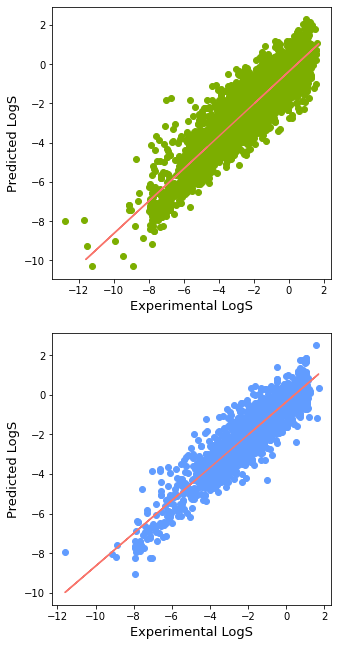

In [124]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS morgan.pdf',dpi=1200)
plt.show()

In [11]:
import shap
from sklearn.preprocessing import StandardScaler
import os
import sys
#import Explanation

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [127]:
X = X_test
Xscaler = StandardScaler()
X2= Xscaler.fit_transform(X)
explainer = shap.TreeExplainer(model,data=X2,feature_perturbation='interventional')
shap_values = explainer.shap_values(X2)


100%|===================| 1686/1688 [07:13<00:00]        

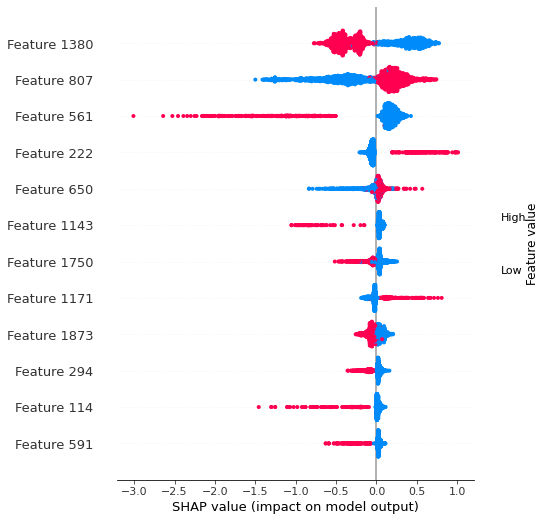

In [128]:
#shap.summary_plot(shap_values, X2,max_display=12)
#shap.summary_plot(shap_values, max_display=12,color='r')
shap.summary_plot(shap_values, X2, plot_type="dot", plot_size=0.6, show=False,max_display=12)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

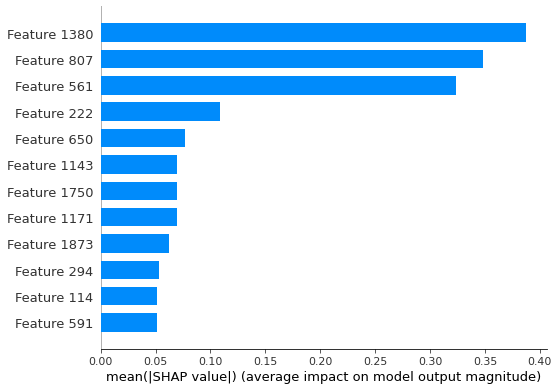

In [321]:
shap.summary_plot(shap_values, max_display=12, plot_type="bar",show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

In [322]:
#vals= np.abs(shap_values).mean(0)
#feature_importance = pd.DataFrame(list(zip(X2,vals)),columns=['col_name','feature_importance_vals'])
#feature_importance["feature_importance_vals"] = np.abs(feature_importance["feature_importance_vals"])
#feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
#feature_importance.head()

import numpy as np
vals= np.abs(shap_values).mean(0)
i=12
feature_importance = pd.DataFrame(list(zip(X2[i], vals)), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance[:12]


,col_name,feature_importance_vals
1380,0.798277,0.387226
807,-1.160907,0.347999
561,-0.383065,0.323412
222,-0.322474,0.108805
650,0.836600,0.076407
1143,-0.188634,0.069769
1750,1.263694,0.069694
1171,-0.471490,0.069169
1873,0.945780,0.062422
294,-0.545402,0.052834


In [75]:
#feature_importance.to_excel(r'D:/python/rdkit/File Name44.xlsx', index = False)

In [59]:
z=sol.iloc[:,0]
z

0                 OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O
1       O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...
2       OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...
3                  CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2
4                            CN1CC2CC(C1)C1=CC=CC(=O)N1C2
                              ...                        
8433                                        O=[N+]([O-])C
8434                                                   OC
8435                                              S=C(N)N
8436                                             O=C(NO)N
8437                                              O=C(N)N
Name: SMILES, Length: 8438, dtype: object

In [60]:
mol=z[1996]
mol

'[#6]CC1=C(C[#6])[NH0]=C2[NH0]=C(O)[NH0]=CC2=[NH0]1'

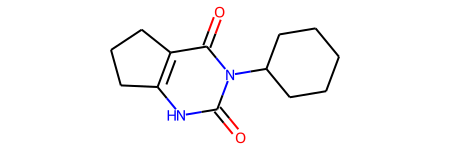

In [23]:
mol = Chem.MolFromSmiles(z[1995])
mol

In [61]:
from rdkit.Chem import rdMolDescriptors

In [62]:
w = Chem.MolFromSmiles(z[8402])
w

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)
# show 10 of the set bits:
list(fp.GetOnBits())[:]



[44, 389, 446, 650, 807, 1917]

In [76]:
#Blind test
sol2 = pd.read_csv('D:/python/rdkit/testexperiment2upload3raw.csv')
print(sol2.head)
XY2 = sol2.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                              Substance  \
0                         hexobarbital   
1                       nalidixic_acid   
2                        phenantroline   
3                        phenobarbital   
4                       sulfamethazine   
5                         bromogramine   
6                      phenazopyridine   
7                           amantadine   
8                      benzylimidazole   
9                       chlorpropamide   
10                          cimetidine   
11                              thymol   
12                          tryptamine   
13                        azathioprine   
14                       sulfathiazole   
15                       acetaminophen   
16                           diazoxide   
17                          famotidine   
18                  hydroflumethiazide   
19                      nitrofurantoin   
20                phthalic_acid_form_I   
21                       sulfacetamide   
22  

In [77]:
#y = []
X3 = []
#bi = {}
for smile, Hlist in XY2.items():
    try:
        X3.append(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), radius=2,nBits = 2048))
  #      y.append(Hlist[0])
    except:
        pass
X3 = [list(c) for c in X3]
print(len(X3))


32


In [78]:
Xnew=X3
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

array([-2.39598452, -3.4272222 , -1.80071   , -2.33071771, -2.38303596,
       -3.92335522, -4.02061667, -2.121475  , -1.50517667, -2.8887597 ,
       -1.49360145, -2.26295   , -2.90505   , -2.84261375, -2.5520033 ,
       -1.1924825 , -3.27504908, -2.58238314, -2.33418333, -3.41979427,
       -0.92818266, -1.41999808, -2.78031587, -2.80345   , -2.20203067,
       -2.88642457, -1.6865601 , -2.003575  , -1.35115913, -4.08115   ,
       -2.34481357, -2.26959875])

In [79]:
#Solubility Challenge
sol3 = pd.read_csv('D:/python/rdkit/testexperiment2upload2raw.csv')
print(sol3.head)
XY3 = sol3.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                      name                                             SMILES
0              Acebutolol        CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1
1             Amoxicillin  O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...
2     Bendroflumethiazide  O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...
3              Benzocaine                             NC1=CC=C(C(OCC)=O)C=C1
4            Benzthiazide  O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...
5   2-chloromandelic_acid                            OC(C(O)C1=CC=CC=C1Cl)=O
6               Clozapine    ClC(C=C1)=CC2=C1NC(C=CC=C3)=C3C(N4CCN(C)CC4)=N2
7               Dibucaine        CCN(CC)CCNC(C1=C(C=CC=C2)C2=NC(OCCCC)=C1)=O
8      Diethylstilbestrol          CC/C(C1=CC=C(O)C=C1)=C(C2=CC=C(O)C=C2)/CC
9              Diflunisal              FC(C=C1F)=CC=C1C2=CC=C(O)C(C(O)=O)=C2
10           Dipyridamole  OCCN(CCO)C1=NC2=C(N3CCCCC3)N=C(N(CCO)CCO)N=C2C...
11              Ephedrine                     

In [80]:
#y = []
X4 = []
#bi = {}
for smile, Hlist in XY3.items():
    try:
        X4.append(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smile), radius=2,nBits = 2048))
  #      y.append(Hlist[0])
    except:
        pass
X4 = [list(c) for c in X4]
print(len(X4))

32


In [81]:
X2new=X4
y2new = model.predict(X2new)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
y2new

array([-2.50491   , -1.81037942, -2.48935   , -2.4324125 , -2.89361478,
       -1.0945315 , -3.05772828, -2.45201973, -2.061784  , -2.1665337 ,
       -0.53451417, -1.01789333, -1.9964175 , -3.70046567, -2.7634855 ,
       -2.12680333, -2.9250575 , -2.835148  , -1.82194832, -1.92767417,
       -1.73876141, -3.35348   , -1.01789333, -2.43653727, -3.83872417,
       -1.41981   , -2.895342  , -2.88939468, -1.67139039, -2.93955967,
       -3.18897833, -2.44397543])

In [51]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(ynew)
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [73]:
i=1656
u=1477

while i<8000:
    w = Chem.MolFromSmiles(z[i])

    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)
# show 10 of the set bits:
    j=list(fp.GetOnBits())[:]

    if u in j:
    #if a==0.97 and b==0.81:
        break
    #u=r2_score(Y_test, Y_pred_test)
    #b=round(u,2)
    
    
    i+=1
i


1814

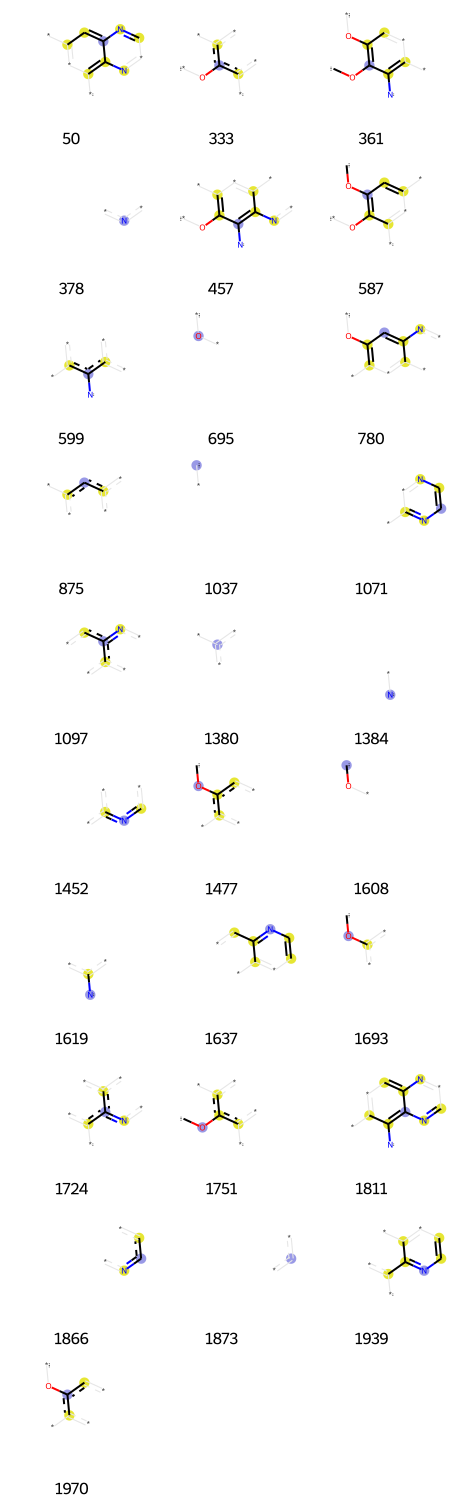

In [74]:
w = Chem.MolFromSmiles(z[1814])
w

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(w, radius=2, bitInfo=bi, nBits = 2048)

tpls = [(w,x,bi) for x in fp.GetOnBits()]
p=Draw.DrawMorganBits(tpls[:],molsPerRow=3,legends=[str(x) for x in fp.GetOnBits()][:])
dpi=1200
p

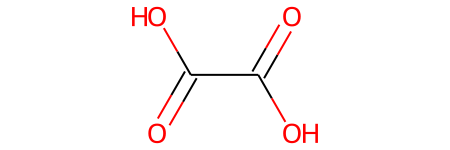

In [423]:
mol=z[2506]
mol
w = Chem.MolFromSmiles(z[8402])
w

In [400]:
def getSubstructSmi(mol,atomID,radius):
    if radius>0:
        env = Chem.FindAtomEnvironmentOfRadiusN(mol,radius,atomID)
        atomsToUse=[]
        for b in env:
            atomsToUse.append(mol.GetBondWithIdx(b).GetBeginAtomIdx())
            atomsToUse.append(mol.GetBondWithIdx(b).GetEndAtomIdx())
        atomsToUse = list(set(atomsToUse))
    else:
        atomsToUse = [atomID]
        env=None
    symbols = []

    smi = Chem.MolFragmentToSmiles(mol,atomsToUse,bondsToUse=env,allHsExplicit=True, allBondsExplicit=True, rootedAtAtom=atomID)
    smi2 = Chem.MolFragmentToSmiles(mol,atomsToUse,bondsToUse=env,atomSymbols=symbols, allBondsExplicit=True, rootedAtAtom=atomID)
    return smi,smi2

In [401]:
bi_bz = {}
fp_bz = AllChem.GetMorganFingerprintAsBitVect(w,radius=2,nBits=2048,bitInfo=bi_bz)
fp_bz

In [402]:
info_bz = []
for bitId,atoms in bi_bz.items():
    exampleAtom,exampleRadius = atoms[0]
    description = getSubstructSmi(w,exampleAtom,exampleRadius)
    info_bz.append((bitId,exampleRadius,description[0],description[1]))
#print(info_bz)

In [403]:
collection = {}
for bid,rad,smi,sma in info_bz:
    collection[bid] = [bid,rad,smi,sma,'','']

In [404]:
import pandas as pd
pd.options.display.width=100000 # options to make sure our wide columns display properly
pd.options.display.max_colwidth=1000

In [405]:
df = pd.DataFrame(list(collection.values()),columns=('Bit','radius','smi_bz','sma_bz','smi_pyr','sma_pyr'))
print(df.to_string())

     Bit  radius                                      smi_bz                 sma_bz smi_pyr sma_pyr
0     80       0                                       [CH2]                      C                
1    106       2  [c](:[cH]:[cH])(:[cH]:[cH])-[C](=[O])-[OH]  c(:c:c)(:c:c)-C(=O)-O                
2    202       2              [cH](:[cH]:[c]):[c](:[cH])-[N]        c(:c:c):c(:c)-N                
3    294       1                                 [CH3]-[CH2]                    C-C                
4    348       2               [CH2](-[CH2]-[CH3])-[CH2]-[N]            C(-C-C)-C-N                
5    389       1                                    [OH]-[C]                    O-C                
6    408       2           [N](-[CH3])(-[CH2]-[CH2])-[N]=[N]        N(-C)(-C-C)-N=N                
7    456       1                        [C](-[c])(=[O])-[OH]            C(-c)(=O)-O                
8    591       2                   [CH2](-[CH3])-[CH2]-[CH2]              C(-C)-C-C                
